# Ce script réalise des graphiques à partir des données des comptes des transports, i.e. nos agrégats de référence pour les transports : taille et composition du parc automobile, consommation des carburants, total des recettes issues de la TICPE


# Import de fonctions spécifiques à Openfisca indirect taxation et de bases de données des Comptes des Transports

In [1]:
%matplotlib inline

from ipp_macro_series_parser.agregats_transports.transports_cleaner import a6_b, g2_1, g_3a
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_carburants, \
    graph_builder_carburants_no_color


# Identification de la série des recettes de la TICPE

In [2]:
recettes_ticpe = a6_b[a6_b['categorie'] == u'TICPE ( TIPP avant 2010) (1)']
recettes_ticpe = recettes_ticpe[recettes_ticpe['index'] == 'Total']
del recettes_ticpe['index']


# Identification des séries des quantités de carburants consommées

In [3]:
g_3a.loc[g_3a['index'] == u'Voitures particulières', 'index'] = 'to_be_used'
g_3a.loc[g_3a['index'] == u'Total VP françaises', 'index'] = 'to_be_used'
quantite_conso_vp = g_3a[g_3a['index'] == 'to_be_used']
del quantite_conso_vp['index']


# Identification des séries décrivant la taille et composition du parc automobile

In [4]:
taille_parc_vp = g2_1[g2_1['categorie'] == u'Voitures particulières']
del taille_parc_vp['categorie']


# Redefinition des index et transposition des dataframes

In [5]:
recettes_ticpe.set_index(['categorie'], inplace = True)
recettes_ticpe = recettes_ticpe.transpose()
taille_parc_vp.set_index(['index'], inplace = True)
taille_parc_vp = taille_parc_vp.transpose()
quantite_conso_vp.set_index(['categorie'], inplace = True)
quantite_conso_vp = quantite_conso_vp.transpose()


# Changement de noms de variables pour être plus explicites

In [6]:
recettes_ticpe.rename(columns = {u'TICPE ( TIPP avant 2010) (1)': 'Total recettes TICPE'}, inplace = True)

taille_parc_vp.rename(columns = {'Total': 'parc vp total', 'dont Diesel': 'dont diesel'}, inplace = True)

quantite_conso_vp = quantite_conso_vp[['ESSENCE + GAZOLE'] + ['ESSENCE'] + ['GAZOLE']]
quantite_conso_vp.rename(columns = {'ESSENCE + GAZOLE': 'consommation totale', 'ESSENCE': 'consommation essence',
    'GAZOLE': 'consommation diesel'}, inplace = True)


# Réalisation des graphiques

Evolution de la taille du parc automobile au cours du temps


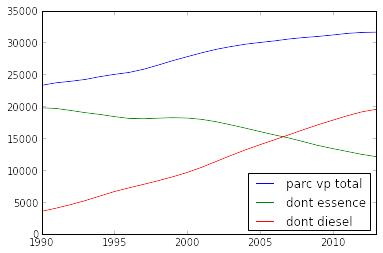

Evolution des quantités de carburants consommées par les voitures particulières françaises


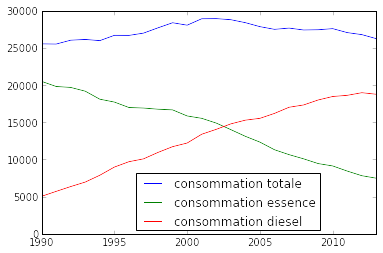

Evolution des recettes totales issues de la TICPE


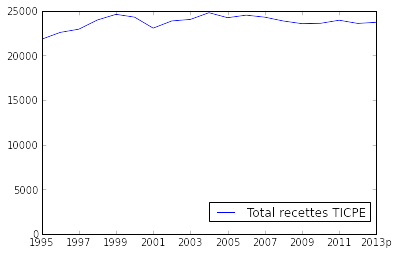

(None, None)

In [7]:
print 'Evolution de la taille du parc automobile au cours du temps'
graph_builder_carburants(taille_parc_vp, 'taille parc vp', 1, 0.3, 'blue', 'green', 'red', None)

print 'Evolution des quantités de carburants consommées par les voitures particulières françaises'
graph_builder_carburants(quantite_conso_vp, 'quantite conso vp', 0.85, 0.3, 'blue', 'green', 'red', None)

print 'Evolution des recettes totales issues de la TICPE'
graph_builder_carburants_no_color(recettes_ticpe, 'recettes totales ticpe', 1, 0.17)
